## Project Instructions

Now that you have been equipped with the skills and the tools to use location data to explore a geographical location, over the course of two weeks, you will have the opportunity to be as creative as you want and come up with an idea to leverage the Foursquare location data to explore or compare neighborhoods or cities of your choice or to come up with a problem that you can use the Foursquare location data to solve. If you cannot think of an idea or a problem, here are some ideas to get you started:

  1.  In Module 3, we explored New York City and the city of Toronto and segmented and clustered their neighborhoods. Both cities are very diverse and are the financial capitals of their respective countries. One interesting idea would be to compare the neighborhoods of the two cities and determine how similar or dissimilar they are. Is New York City more like Toronto or Paris or some other multicultural city? I will leave it to you to refine this idea.
  2. In a city of your choice, if someone is looking to open a restaurant, where would you recommend that they open it? Similarly, if a contractor is trying to start their own business, where would you recommend that they setup their office?

These are just a couple of many ideas and problems that can be solved using location data in addition to other datasets. No matter what you decide to do, make sure to provide sufficient justification of why you think what you want to do or solve is important and why would a client or a group of people be interested in your project.

For this week, you will required to submit the following:

    A description of the problem and a discussion of the background. (15 marks)
    A description of the data and how it will be used to solve the problem. (15 marks)

## The Problem

In this hypothetical situation, our client, who is an entrepreneur, wants to open an independent coffee shop in Toronto. We have been assigned to search for the best possible neighborhood. Our job is to use data science and analysis and recommend a list of such possible neighborhoods.

## Introduction (Problem Details and Background)

Toronto is the largest city and the financial capital of Canada. And as one would expect, the market for coffee shops for the most part has already been served by existing businesses. We give special attention to the following to find remaining opportunities in this highly competitive market:

1. Population: The neighborhood  to have a large enough population for a new coffee shop to find its own patrons.
2. Average Income: After accounting for employees, rent and utilities the price of a cup of coffee will have to be on the higher end for a business to survive. So the average income of people in the neighborhood need to be ideally in the top 50%.
3. Walkability: New coffee shops usually do better where there is foot traffic and people take a risk of exploring new venues. A higher Walk Score would make for a better potential cadidate.
4. Business atmosphere: We want to see a lot of examples of already successful businesses and low debt risk score, indicating a good environment for business. Moreover, the existence of multiple successful coffee shops in the neighborhood would be a huge plus.
5. Parks and Playgrounds: Such spaces for recreation invites lots of people, including new faces, everyday. This is especially true in large cities.

We want to be in a cluster which has high scores is as many of the five factors above as possible. Finally we need to be cognizant about property prices and find the "biggest bang for the buck". Above a certain price, it's very likely we'll see barely any improvement in the factors listed above.

## Data: Source and Usage

Sources of various data used in the analysis are listed below:
1. Population, Average income - Wikipedia
2. Walkability - Wellbeing Toronto Civics Equity Indicators (Toronto Open Data)
3. Businesses - Wellbeing Toronto Economics (Toronto Open Data)
4. Coffee shops - Foursquare API
5. Parks and Playgrounds - Foursquare API
6. Home prices - Wellbeing Toronto Economics (Toronto Open Data)

Data on population, average income, walkability, neighborhood businesses including coffee shops and recreational spaces are used to analyze the five factors highlighted previously in the introduction. We normalize the data so that all the features have equal weight and have values between 0 and 1. We cluster them into 4 clusters, choose the ones whose centroid has the highest value (by square root of sum of square of coordinates). Finally, we compare property prices of the list of selected neighborhoods and choose a list of 3-5 desired neighborhoods. 


In [103]:
import urllib.request
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import folium # map rendering library
from bs4 import BeautifulSoup
from functools import reduce
import scipy

print('Libraries imported.')

Libraries imported.


## Demographics of Toronto Neighborhoods

In [104]:
#url to download table from
url="https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods"

In [105]:
page=urllib.request.urlopen(url)
page

In [106]:
soup=BeautifulSoup(page,"lxml")

In [107]:
#make source more readable
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Demographics of Toronto neighbourhoods - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XsUcogpAICgAAA4ZTwUAAABH","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Demographics_of_Toronto_neighbourhoods","wgTitle":"Demographics of Toronto neighbourhoods","wgCurRevisionId":955167726,"wgRevisionId":955167726,"wgArticleId":38958143,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with obsolete information from April 2013","All Wikipedia articles in need of 

In [108]:
#table is stored under class 'wikitable sortable'
demo_table=soup.find('table',class_='wikitable sortable')
demo_table

<table border="1" cellpadding="5" cellspacing="0" class="wikitable sortable">
<tbody><tr>
<th width="20%">Name
</th>
<th width="5%">FM
</th>
<th width="20%">Census Tracts
</th>
<th width="5%">Population
</th>
<th width="5%">Land area (km2)
</th>
<th width="5%">Density (people/km2)
</th>
<th width="5%">% Change in Population since 2001
</th>
<th width="5%">Average Income
</th>
<th width="5%">Transit Commuting %
</th>
<th width="5%">% Renters
</th>
<th width="10%">Second most common language (after English) by name
</th>
<th width="10%">Second most common language (after English) by percentage
</th>
<th width="10%">Map
</th></tr>
<tr>
<td><b>Toronto <a class="mw-redirect" href="/wiki/Census_metropolitan_area" title="Census metropolitan area">CMA</a> Average</b>
</td>
<td>
</td>
<td>All
</td>
<td><b>5,113,149</b>
</td>
<td><b>5903.63</b>
</td>
<td><b>866</b>
</td>
<td><b>9.0</b>
</td>
<td><b>40,704</b>
</td>
<td><b>10.6</b>
</td>
<td><b>11.4</b>
</td>
<td>
</td>
<td>
</td>
<td>
</td></tr>

In [109]:
#table values appear between 'td' which themselves are in between 'tr' tags. A,B,C are empty lists to save columns in table.
A=[]
B=[]
C=[]
D=[]
E=[]
F=[]
G=[]
H=[]
I=[]
J=[]
K=[]
L=[]
M=[]

for row in demo_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==13:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        D.append(cells[3].find(text=True))
        E.append(cells[4].find(text=True))
        F.append(cells[5].find(text=True))
        G.append(cells[6].find(text=True))
        H.append(cells[7].find(text=True))
        I.append(cells[8].find(text=True))
        J.append(cells[9].find(text=True))
        K.append(cells[10].find(text=True))
        L.append(cells[11].find(text=True))
        M.append(cells[12].find(text=True))

In [110]:
df_Neighborhood=pd.DataFrame(A)
df_FM=pd.DataFrame(B)
df_Census_Tracts=pd.DataFrame(C)
df_Population=pd.DataFrame(D)
df_Land_area=pd.DataFrame(E)
df_Density=pd.DataFrame(F)
df_Delta_Population=pd.DataFrame(G)
df_Average_Income=pd.DataFrame(H)
df_Transit_Commuting=pd.DataFrame(I)
df_Renters=pd.DataFrame(J)

In [111]:
demographics={'Neighborhood':A,'Population':D,'Average Income':H}

In [112]:
df_demographics=pd.DataFrame(data=demographics)
df_demographics

,Neighborhood,Population,Average Income
0,Toronto,"5,113,149","40,704"
1,Agincourt,"44,577\n","25,750\n"
2,Alderwood,"11,656\n","35,239\n"
3,Alexandra Park,"4,355\n","19,687\n"
4,Allenby,"2,513\n","245,592\n"
5,Amesbury,"17,318\n","27,546\n"
6,Armour Heights,"4,384\n","116,651\n"
7,Banbury,"6,641\n","92,319\n"
8,Bathurst Manor,"14,945\n","34,169\n"
9,Bay Street Corridor,"4,787\n","40,598\n"


Let's remove the top row which shows values for entire Toronto and then clean up the table.

In [113]:
df_demographics=df_demographics.replace('\\n','',regex=True)
df_demographics.drop(0,axis=0,inplace=True)
df_demographics['Neighborhood']=df_demographics['Neighborhood'] + ', Toronto'
df_demographics.head()

,Neighborhood,Population,Average Income
1,"Agincourt, Toronto","44,577","25,750"
2,"Alderwood, Toronto","11,656","35,239"
3,"Alexandra Park, Toronto","4,355","19,687"
4,"Allenby, Toronto","2,513","245,592"
5,"Amesbury, Toronto","17,318","27,546"


Dataframe df_demographics will store population and average income for Toronto neighborhoods. Next we focus on creating a dataframe with Walk Scores provided in Wellbeing Toronto Civics Equity Indicators dataset obtained through Toronto Open Data.

In [114]:
df_walkability=pd.read_excel('wellbeing-toronto-civics-equity-indicators.xlsx',sheet_name='RawData-Ref Period 2011')

Let's clean up the table and keep only names of neighborhoods and corresponding Walk Score in the dataframe. We also change the spelling of Neighborhood to Neighborhood so we don't have inconsistency in column name.

In [115]:
df_walkability.columns=df_walkability.iloc[0]
df_walkability.drop([0], inplace=True)
df_walkability.rename(columns={'Neighbourhood':'Neighborhood'},inplace=True)
df_walkability=df_walkability[['Neighborhood','Walk Score']]
df_walkability['Neighborhood']=df_walkability['Neighborhood']+', Toronto'
df_walkability

,Neighborhood,Walk Score
1,"West Humber-Clairville, Toronto",57
2,"Mount Olive-Silverstone-Jamestown, Toronto",61
3,"Thistletown-Beaumond Heights, Toronto",54
4,"Rexdale-Kipling, Toronto",58
5,"Elms-Old Rexdale, Toronto",48
6,"Kingsview Village-The Westway, Toronto",56
7,"Willowridge-Martingrove-Richview, Toronto",51
8,"Humber Heights-Westmount, Toronto",58
9,"Edenbridge-Humber Valley, Toronto",49
10,"Princess-Rosethorn, Toronto",48


Next we take data on businessed and home prices from Wellbeing Toronto Economics report obtained through Toronto Open Data.

In [116]:
df_economics=pd.read_excel('wellbeing-toronto-economics.xlsx',sheet_name='RawData-Ref Period 2011')
df_economics

,Neighbourhood,Neighbourhood Id,Businesses,Child Care Spaces,Debt Risk Score,Home Prices,Local Employment,Social Assistance Recipients
0,West Humber-Clairville,1,2463,195,719,317508,58271,2912
1,Mount Olive-Silverstone-Jamestown,2,271,60,687,251119,3244,6561
2,Thistletown-Beaumond Heights,3,217,25,718,414216,1311,1276
3,Rexdale-Kipling,4,144,75,721,392271,1178,1323
4,Elms-Old Rexdale,5,67,60,692,233832,903,1683
5,Kingsview Village-The Westway,6,160,129,717,292861,2799,4348
6,Willowridge-Martingrove-Richview,7,169,165,750,511637,1843,2032
7,Humber Heights-Westmount,8,82,140,753,491396,896,856
8,Edenbridge-Humber Valley,9,153,30,761,873268,1334,751
9,Princess-Rosethorn,10,74,367,791,971668,1226,299


We only keep the data on number of businesses and debt risk score in the dataframe.

In [117]:
df_economics.rename(columns={'Neighbourhood':'Neighborhood'},inplace=True)
df_economics=df_economics[['Neighborhood','Businesses','Debt Risk Score']]
df_economics['Neighborhood']=df_economics['Neighborhood']+', Toronto'
df_economics

/home/user-1131/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Neighborhood,Businesses,Debt Risk Score
0,"West Humber-Clairville, Toronto",2463,719
1,"Mount Olive-Silverstone-Jamestown, Toronto",271,687
2,"Thistletown-Beaumond Heights, Toronto",217,718
3,"Rexdale-Kipling, Toronto",144,721
4,"Elms-Old Rexdale, Toronto",67,692
5,"Kingsview Village-The Westway, Toronto",160,717
6,"Willowridge-Martingrove-Richview, Toronto",169,750
7,"Humber Heights-Westmount, Toronto",82,753
8,"Edenbridge-Humber Valley, Toronto",153,761
9,"Princess-Rosethorn, Toronto",74,791


Data we have gathered so far is stored in three separate dataframes: df_economics, df_walkability and df_demographics. We need to combine the three dataframes before we add columns with data from foursquare.

In [118]:
dfs=[df_economics,df_walkability,df_demographics]

In [119]:
from functools import partial, reduce
merge = partial(pd.merge, on=['Neighborhood'], how='left')
df_combined=reduce(merge, dfs)
df_combined.to_csv('combined_table.csv',index=0)
df_combined

,Neighborhood,Businesses,Debt Risk Score,Walk Score,Population,Average Income
0,"West Humber-Clairville, Toronto",2463,719,57,NaN,NaN
1,"Mount Olive-Silverstone-Jamestown, Toronto",271,687,61,NaN,NaN
2,"Thistletown-Beaumond Heights, Toronto",217,718,54,NaN,NaN
3,"Rexdale-Kipling, Toronto",144,721,58,NaN,NaN
4,"Elms-Old Rexdale, Toronto",67,692,48,NaN,NaN
5,"Kingsview Village-The Westway, Toronto",160,717,56,NaN,NaN
6,"Willowridge-Martingrove-Richview, Toronto",169,750,51,NaN,NaN
7,"Humber Heights-Westmount, Toronto",82,753,58,NaN,NaN
8,"Edenbridge-Humber Valley, Toronto",153,761,49,NaN,NaN
9,"Princess-Rosethorn, Toronto",74,791,48,NaN,NaN


If Elif Try Except
a='abc-def-fgh'
j=a.split(sep='-')
j[-1]
'fgh'
j[-2]
'def'

In [120]:
#include loop to go through entire df_combined for each item in df_demographics

i=0
while i<len(df_combined):
    name=df_combined.iloc[i,0].split(sep='-')
    j=0
    while j<len(df_demographics):
        k=1
        while k<=len(name):
            if k==1:
                neighborhood=name[-k]
                if df_demographics.iloc[j,0]==neighborhood:
                    df_combined.iloc[i,4]=df_demographics.iloc[j,1]
                    df_combined.iloc[i,5]=df_demographics.iloc[j,2]
            if k>1:
                neighborhood=name[-k]+', Toronto'
                if df_demographics.iloc[j,0]==neighborhood:
                    df_combined.iloc[i,4]=df_demographics.iloc[j,1]
                    df_combined.iloc[i,5]=df_demographics.iloc[j,2]
            k+=1
        j+=1
    i+=1
df_combined

,Neighborhood,Businesses,Debt Risk Score,Walk Score,Population,Average Income
0,"West Humber-Clairville, Toronto",2463,719,57,"8,506","26,610"
1,"Mount Olive-Silverstone-Jamestown, Toronto",271,687,61,NaN,NaN
2,"Thistletown-Beaumond Heights, Toronto",217,718,54,"16,790","28,955"
3,"Rexdale-Kipling, Toronto",144,721,58,NaN,NaN
4,"Elms-Old Rexdale, Toronto",67,692,48,NaN,NaN
5,"Kingsview Village-The Westway, Toronto",160,717,56,"16,254","32,004"
6,"Willowridge-Martingrove-Richview, Toronto",169,750,51,"26,053","34,579"
7,"Humber Heights-Westmount, Toronto",82,753,58,"5,857","35,183"
8,"Edenbridge-Humber Valley, Toronto",153,761,49,NaN,NaN
9,"Princess-Rosethorn, Toronto",74,791,48,NaN,NaN


In [121]:
df_combined=df_combined.dropna()
df_combined.reset_index(inplace=True)
#df_combined.drop('index',inplace=True)
df_combined

,index,Neighborhood,Businesses,Debt Risk Score,Walk Score,Population,Average Income
0,0,"West Humber-Clairville, Toronto",2463,719,57,"8,506","26,610"
1,2,"Thistletown-Beaumond Heights, Toronto",217,718,54,"16,790","28,955"
2,5,"Kingsview Village-The Westway, Toronto",160,717,56,"16,254","32,004"
3,6,"Willowridge-Martingrove-Richview, Toronto",169,750,51,"26,053","34,579"
4,7,"Humber Heights-Westmount, Toronto",82,753,58,"5,857","35,183"
5,10,"Eringate-Centennial-West Deane, Toronto",229,775,57,"8,008","34,789"
6,11,"Markland Wood, Toronto",106,783,69,"10,240","51,695"
7,16,"Mimico, Toronto",619,741,71,"14,198","47,011"
8,17,"New Toronto, Toronto",368,719,79,"10,455","33,415"
9,18,"Long Branch, Toronto",170,724,72,"9,625","37,288"


In [122]:
df_combined['Average Income'].unique

<bound method Series.unique of 0      26,610
1      28,955
2      32,004
3      34,579
4      35,183
5      34,789
6      51,695
7      47,011
8      33,415
9      37,288
10     35,239
11     26,117
12     24,297
13     32,002
14     26,751
15     24,432
16     27,611
17     27,546
18     35,022
19     34,169
20     27,826
21     46,631
22     80,827
23     92,099
24     47,515
25     29,657
26     23,471
27     34,811
28     29,250
29     30,442
30     26,660
31     46,752
32     56,395
33     25,340
34     82,670
35     33,172
36     67,536
37     44,557
38     50,398
39     19,521
40     40,598
41     31,231
42     44,611
43     27,961
44     29,224
45     46,820
46     58,681
47     46,437
48     42,635
49     27,446
50     28,335
51     25,029
52     53,613
53     82,203
54    213,941
55     28,403
56     27,446
57     23,910
58     26,660
59     26,375
60     33,392
61     21,155
62     32,701
63     38,182
64     25,078
65     26,525
66     29,723
67     25,243
68     29,230
69 

In [123]:
df_combined.shape

(77, 7)

In [124]:
df_combined.drop('index',axis=1,inplace=True)
df_combined

/home/user-1131/venv/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Neighborhood,Businesses,Debt Risk Score,Walk Score,Population,Average Income
0,"West Humber-Clairville, Toronto",2463,719,57,"8,506","26,610"
1,"Thistletown-Beaumond Heights, Toronto",217,718,54,"16,790","28,955"
2,"Kingsview Village-The Westway, Toronto",160,717,56,"16,254","32,004"
3,"Willowridge-Martingrove-Richview, Toronto",169,750,51,"26,053","34,579"
4,"Humber Heights-Westmount, Toronto",82,753,58,"5,857","35,183"
5,"Eringate-Centennial-West Deane, Toronto",229,775,57,"8,008","34,789"
6,"Markland Wood, Toronto",106,783,69,"10,240","51,695"
7,"Mimico, Toronto",619,741,71,"14,198","47,011"
8,"New Toronto, Toronto",368,719,79,"10,455","33,415"
9,"Long Branch, Toronto",170,724,72,"9,625","37,288"


In [125]:
df_combined.to_csv('combined_table_excluding_foursquare.csv',index=0)

In [126]:
df_combined=pd.read_csv('combined_table_excluding_foursquare.csv',thousands=',')
df_combined

,Neighborhood,Businesses,Debt Risk Score,Walk Score,Population,Average Income
0,"West Humber-Clairville, Toronto",2463,719,57,8506,26610
1,"Thistletown-Beaumond Heights, Toronto",217,718,54,16790,28955
2,"Kingsview Village-The Westway, Toronto",160,717,56,16254,32004
3,"Willowridge-Martingrove-Richview, Toronto",169,750,51,26053,34579
4,"Humber Heights-Westmount, Toronto",82,753,58,5857,35183
5,"Eringate-Centennial-West Deane, Toronto",229,775,57,8008,34789
6,"Markland Wood, Toronto",106,783,69,10240,51695
7,"Mimico, Toronto",619,741,71,14198,47011
8,"New Toronto, Toronto",368,719,79,10455,33415
9,"Long Branch, Toronto",170,724,72,9625,37288


In the next step we add data from foursquare. But before we move on to the next step let's just check data types and summary of columns in df_combined.This will give us a feel for the numbers we're working with. 

In [127]:
df_combined.dtypes

Neighborhood       object
Businesses          int64
Debt Risk Score     int64
Walk Score          int64
Population          int64
Average Income      int64
dtype: object

In [128]:
df_combined.describe()

,Businesses,Debt Risk Score,Walk Score,Population,Average Income
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,532.376623,737.675325,69.909091,16747.831169,38625.207792
std,658.431710,28.086540,11.919888,10374.276502,25114.396089
min,47.000000,679.000000,42.000000,2790.000000,19521.000000
25%,184.000000,719.000000,61.000000,10240.000000,26660.000000
50%,345.000000,738.000000,69.000000,14198.000000,31231.000000
75%,591.000000,758.000000,79.000000,21287.000000,42635.000000
max,4324.000000,791.000000,99.000000,52220.000000,213941.000000


Add columns showing latitude and longitude of each neighborhood

In [129]:
df_combined['Latitude']=''
df_combined['Longitude']=''
df_combined

,Neighborhood,Businesses,Debt Risk Score,Walk Score,Population,Average Income,Latitude,Longitude
0,"West Humber-Clairville, Toronto",2463,719,57,8506,26610,,
1,"Thistletown-Beaumond Heights, Toronto",217,718,54,16790,28955,,
2,"Kingsview Village-The Westway, Toronto",160,717,56,16254,32004,,
3,"Willowridge-Martingrove-Richview, Toronto",169,750,51,26053,34579,,
4,"Humber Heights-Westmount, Toronto",82,753,58,5857,35183,,
5,"Eringate-Centennial-West Deane, Toronto",229,775,57,8008,34789,,
6,"Markland Wood, Toronto",106,783,69,10240,51695,,
7,"Mimico, Toronto",619,741,71,14198,47011,,
8,"New Toronto, Toronto",368,719,79,10455,33415,,
9,"Long Branch, Toronto",170,724,72,9625,37288,,


In [130]:
#Using Nominatim to extract latitude and longitude for Toronto neighborhoods

geolocator=Nominatim(user_agent="toronto_explorer")
numRows=len(df_combined.index)
i=0
while i<numRows:
    location=geolocator.geocode(df_combined.iloc[i,0])
    try:
        lat=location.latitude
        lon=location.longitude
    except:
        lat=0
        lon=0
    df_combined.iloc[i,6]=lat
    df_combined.iloc[i,7]=lon
    #print(i,lat,lon)
    i+=1
df_combined

,Neighborhood,Businesses,Debt Risk Score,Walk Score,Population,Average Income,Latitude,Longitude
0,"West Humber-Clairville, Toronto",2463,719,57,8506,26610,0,0
1,"Thistletown-Beaumond Heights, Toronto",217,718,54,16790,28955,0,0
2,"Kingsview Village-The Westway, Toronto",160,717,56,16254,32004,0,0
3,"Willowridge-Martingrove-Richview, Toronto",169,750,51,26053,34579,0,0
4,"Humber Heights-Westmount, Toronto",82,753,58,5857,35183,43.6885,-79.5064
5,"Eringate-Centennial-West Deane, Toronto",229,775,57,8008,34789,0,0
6,"Markland Wood, Toronto",106,783,69,10240,51695,43.6312,-79.5854
7,"Mimico, Toronto",619,741,71,14198,47011,43.6167,-79.4968
8,"New Toronto, Toronto",368,719,79,10455,33415,43.6008,-79.5053
9,"Long Branch, Toronto",170,724,72,9625,37288,43.592,-79.5454


In [131]:
##USING THIS CELL WILL REMOVE ALL LATITUDE AND LONGITUDE DATA PERMANENTLY
#df1=df_combined[df_combined['Latitude']==0]
#df1.to_csv('missing_values.csv')

In [132]:
df2=pd.read_csv('missing_values.csv')
df2.drop('Unnamed: 0',axis=1,inplace=True)
df2

,Neighborhood,Businesses,Debt Risk Score,Walk Score,Population,Average Income,Latitude,Longitude,Top Venues
0,"West Humber-Clairville, Toronto",2463,719,57,8506,26610,43.750000,79.638889,NaN
1,"Thistletown-Beaumond Heights, Toronto",217,718,54,16790,28955,43.737222,-79.565278,NaN
2,"Kingsview Village-The Westway, Toronto",160,717,56,16254,32004,43.694444,-79.558611,NaN
3,"Willowridge-Martingrove-Richview, Toronto",169,750,51,26053,34579,43.677222,-79.550833,NaN
4,"Eringate-Centennial-West Deane, Toronto",229,775,57,8008,34789,43.661383,-79.570720,NaN
5,"Humbermede, Toronto",374,695,58,14778,24297,43.746297,-79.541186,NaN
6,"Downsview-Roding-CFB, Toronto",985,692,59,36613,26751,43.732222,-79.493333,NaN
7,"Brookhaven-Amesbury, Toronto",466,687,62,17318,27546,43.700556,-79.490278,NaN
8,"Westminster-Branson, Toronto",83,730,61,16386,27826,43.656000,-79.475000,NaN
9,"Bedford Park-Nortown, Toronto",676,776,73,13749,80827,43.730000,-79.411000,NaN


In [133]:
i=0
while i<len(df_combined['Neighborhood']):
    j=0
    while j<len(df2['Neighborhood']):
        if df_combined.iloc[i,0]==df2.iloc[j,0]:
            df_combined.iloc[i,6]=df2.iloc[j,6]
            df_combined.iloc[i,7]=df2.iloc[j,7]
        j+=1
    i+=1
df_combined

,Neighborhood,Businesses,Debt Risk Score,Walk Score,Population,Average Income,Latitude,Longitude
0,"West Humber-Clairville, Toronto",2463,719,57,8506,26610,43.75,79.6389
1,"Thistletown-Beaumond Heights, Toronto",217,718,54,16790,28955,43.7372,-79.5653
2,"Kingsview Village-The Westway, Toronto",160,717,56,16254,32004,43.6944,-79.5586
3,"Willowridge-Martingrove-Richview, Toronto",169,750,51,26053,34579,43.6772,-79.5508
4,"Humber Heights-Westmount, Toronto",82,753,58,5857,35183,43.6885,-79.5064
5,"Eringate-Centennial-West Deane, Toronto",229,775,57,8008,34789,43.6614,-79.5707
6,"Markland Wood, Toronto",106,783,69,10240,51695,43.6312,-79.5854
7,"Mimico, Toronto",619,741,71,14198,47011,43.6167,-79.4968
8,"New Toronto, Toronto",368,719,79,10455,33415,43.6008,-79.5053
9,"Long Branch, Toronto",170,724,72,9625,37288,43.592,-79.5454


In [134]:
df_combined

,Neighborhood,Businesses,Debt Risk Score,Walk Score,Population,Average Income,Latitude,Longitude
0,"West Humber-Clairville, Toronto",2463,719,57,8506,26610,43.75,79.6389
1,"Thistletown-Beaumond Heights, Toronto",217,718,54,16790,28955,43.7372,-79.5653
2,"Kingsview Village-The Westway, Toronto",160,717,56,16254,32004,43.6944,-79.5586
3,"Willowridge-Martingrove-Richview, Toronto",169,750,51,26053,34579,43.6772,-79.5508
4,"Humber Heights-Westmount, Toronto",82,753,58,5857,35183,43.6885,-79.5064
5,"Eringate-Centennial-West Deane, Toronto",229,775,57,8008,34789,43.6614,-79.5707
6,"Markland Wood, Toronto",106,783,69,10240,51695,43.6312,-79.5854
7,"Mimico, Toronto",619,741,71,14198,47011,43.6167,-79.4968
8,"New Toronto, Toronto",368,719,79,10455,33415,43.6008,-79.5053
9,"Long Branch, Toronto",170,724,72,9625,37288,43.592,-79.5454


In [135]:
CLIENT_ID='PYNHU1PLA0FGQ55PEUAT1N1IVXFHE2QWPOL2AHTUJHOB1YNE'
CLIENT_SECRET='M5O3GYPMSS1R1HWMP4LBC4ZGQTEZHYB4HMC15LRVORQ2VX1J'
VERSION='20180605'

In [136]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [137]:
toronto_venues = getNearbyVenues(names=df_combined['Neighborhood'],
                                   latitudes=df_combined['Latitude'],
                                   longitudes=df_combined['Longitude']
                                  )
toronto_venues.head()

West Humber-Clairville, Toronto
Thistletown-Beaumond Heights, Toronto
Kingsview Village-The Westway, Toronto
Willowridge-Martingrove-Richview, Toronto
Humber Heights-Westmount, Toronto
Eringate-Centennial-West Deane, Toronto
Markland Wood, Toronto
Mimico, Toronto
New Toronto, Toronto
Long Branch, Toronto
Alderwood, Toronto
Humber Summit, Toronto
Humbermede, Toronto
Pelmo Park-Humberlea, Toronto
Downsview-Roding-CFB, Toronto
York University Heights, Toronto
Maple Leaf, Toronto
Brookhaven-Amesbury, Toronto
Yorkdale-Glen Park, Toronto
Bathurst Manor, Toronto
Westminster-Branson, Toronto
Lansing-Westgate, Toronto
Bedford Park-Nortown, Toronto
Bridle Path-Sunnybrook-York Mills, Toronto
Banbury-Don Mills, Toronto
Victoria Village, Toronto
Flemingdon Park, Toronto
Parkwoods-Donalda, Toronto
Pleasant View, Toronto
Don Valley Village, Toronto
Bayview Woods-Steeles, Toronto
Bayview Village, Toronto
Henry Farm, Toronto
Thorncliffe Park, Toronto
Leaside-Bennington, Toronto
Old East York, Toronto
T

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Thistletown-Beaumond Heights, Toronto",43.737222,-79.565278,Drupati's Doubles & Roti Shop,43.736222,-79.563471,Caribbean Restaurant
1,"Thistletown-Beaumond Heights, Toronto",43.737222,-79.565278,Dairy Queen,43.736232,-79.565309,Ice Cream Shop
2,"Thistletown-Beaumond Heights, Toronto",43.737222,-79.565278,Rajdhani Sweets & Restaurant,43.738409,-79.566246,Indian Restaurant
3,"Thistletown-Beaumond Heights, Toronto",43.737222,-79.565278,Madras Dosa Hut,43.737156,-79.566460,Indian Restaurant
4,"Thistletown-Beaumond Heights, Toronto",43.737222,-79.565278,Pizza Pizza,43.736619,-79.564600,Pizza Place


In [138]:
#save toronto_venues to a csv file
toronto_venues.to_csv('toronto_venues.csv',index=0)

In [139]:
toronto_venues=pd.read_csv('toronto_venues.csv')
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Thistletown-Beaumond Heights, Toronto",43.737222,-79.565278,Drupati's Doubles & Roti Shop,43.736222,-79.563471,Caribbean Restaurant
1,"Thistletown-Beaumond Heights, Toronto",43.737222,-79.565278,Dairy Queen,43.736232,-79.565309,Ice Cream Shop
2,"Thistletown-Beaumond Heights, Toronto",43.737222,-79.565278,Rajdhani Sweets & Restaurant,43.738409,-79.566246,Indian Restaurant
3,"Thistletown-Beaumond Heights, Toronto",43.737222,-79.565278,Madras Dosa Hut,43.737156,-79.566460,Indian Restaurant
4,"Thistletown-Beaumond Heights, Toronto",43.737222,-79.565278,Pizza Pizza,43.736619,-79.564600,Pizza Place


In [140]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Alderwood, Toronto",9,9,9,9,9,9
"Banbury-Don Mills, Toronto",4,4,4,4,4,4
"Bathurst Manor, Toronto",4,4,4,4,4,4
"Bay Street Corridor, Toronto",32,32,32,32,32,32
"Bayview Village, Toronto",14,14,14,14,14,14
"Bayview Woods-Steeles, Toronto",4,4,4,4,4,4
"Bedford Park-Nortown, Toronto",3,3,3,3,3,3
"Bendale, Toronto",8,8,8,8,8,8
"Birchcliffe-Cliffside, Toronto",7,7,7,7,7,7


One-hot encoding the presence and type of venues of different venues

In [141]:
# one hot encoding to transform categorical variable to numerical variable.
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
toronto_onehot=toronto_onehot[['Neighborhood']+[col for col in toronto_onehot.columns if col!='Neighborhood']]
toronto_onehot['Neighborhood']=toronto_venues['Neighborhood']
toronto_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Beer Bar,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Stop,Business Service,Butcher,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Home Service,Hong Kong Restaurant,Hot Dog Joint,Hotel,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Lawyer,Library,Light Rail Station,Lighting Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Motorcycle Shop,Movie Theater,Museum,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Outdoor Supply Store,Outdoors & Recreation,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Rental Car Location,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Tree,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,"Thistletown-Beaumond Heights, Toronto",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Thistletown-Beaumond Heights, Toronto",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

One-hot encoding categorical variables, grouped by neighborhood and expressed as normalized frequency

In [142]:
#one-hot encoded categorical variables grouped by neighborhood and expressed as normalized frequency
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Beer Bar,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Stop,Business Service,Butcher,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Home Service,Hong Kong Restaurant,Hot Dog Joint,Hotel,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Lawyer,Library,Light Rail Station,Lighting Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Motorcycle Shop,Movie Theater,Museum,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Outdoor Supply Store,Outdoors & Recreation,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Rental Car Location,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Tree,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,"Alderwood, Toronto",0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [143]:
num_top_venues = 10 #number of venues in each neighborhood to show

for hood in toronto_grouped['Neighborhood']: #go through each neighborhood and list corresponding top 10 venues
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index() #list of columns written as a column
    temp.columns = ['venue','freq'] 
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alderwood, Toronto----
                        venue  freq
0                 Pizza Place  0.22
1                    Pharmacy  0.11
2              Sandwich Place  0.11
3                         Pub  0.11
4                         Gym  0.11
5                        Pool  0.11
6                 Coffee Shop  0.11
7                Skating Rink  0.11
8  Modern European Restaurant  0.00
9             Motorcycle Shop  0.00


----Banbury-Don Mills, Toronto----
                        venue  freq
0            Botanical Garden  0.25
1                Intersection  0.25
2                 Coffee Shop  0.25
3                        Park  0.25
4           Accessories Store  0.00
5                Noodle House  0.00
6   Middle Eastern Restaurant  0.00
7          Miscellaneous Shop  0.00
8           Mobile Phone Shop  0.00
9  Modern European Restaurant  0.00


----Bathurst Manor, Toronto----
                       venue  freq
0          Convenience Store  0.25
1                 Playground  0.25
2    

Top 10 categories of venues for each neighborhood in toronto_grouped

In [144]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [145]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']
print(toronto_grouped)
for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

                                  Neighborhood  Accessories Store  \
0                           Alderwood, Toronto           0.000000   
1                   Banbury-Don Mills, Toronto           0.000000   
2                      Bathurst Manor, Toronto           0.000000   
3                 Bay Street Corridor, Toronto           0.000000   
4                     Bayview Village, Toronto           0.000000   
5               Bayview Woods-Steeles, Toronto           0.000000   
6                Bedford Park-Nortown, Toronto           0.000000   
7                             Bendale, Toronto           0.000000   
8               Birchcliffe-Cliffside, Toronto           0.000000   
9   Bridle Path-Sunnybrook-York Mills, Toronto           0.000000   
10                Brookhaven-Amesbury, Toronto           0.000000   
11    Cabbagetown-South St.James Town, Toronto           0.000000   
12                 Caledonia-Fairbank, Toronto           0.000000   
13                          Casa L

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Alderwood, Toronto",Pizza Place,Coffee Shop,Gym,Skating Rink,Sandwich Place,Pool,Pub,Pharmacy,Cupcake Shop,Dive Bar
1,"Banbury-Don Mills, Toronto",Botanical Garden,Park,Coffee Shop,Intersection,Yoga Studio,Donut Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm
2,"Bathurst Manor, Toronto",Convenience Store,Park,Playground,Baseball Field,Dog Run,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
3,"Bay Street Corridor, Toronto",Yoga Studio,Bubble Tea Shop,Coffee Shop,Café,Sushi Restaurant,Restaurant,Food & Drink Shop,Martial Arts Dojo,Burrito Place,Salon / Barbershop
4,"Bayview Village, Toronto",Bank,Clothing Store,Fast Food Restaurant,Fish Market,Sporting Goods Shop,Metro Station,Sandwich Place,Gas Station,Pizza Place,Pet Store


In [146]:
tor_categories=toronto_venues.groupby('Neighborhood')['Venue Category'].apply(list).reset_index(name='Venue_Category_List')

In [147]:
tor_categories.head()

,Neighborhood,Venue_Category_List
0,"Alderwood, Toronto","[Pizza Place, Pub, Gym, Coffee Shop, Pizza Pla..."
1,"Banbury-Don Mills, Toronto","[Park, Botanical Garden, Coffee Shop, Intersec..."
2,"Bathurst Manor, Toronto","[Convenience Store, Baseball Field, Playground..."
3,"Bay Street Corridor, Toronto","[Gastropub, Mexican Restaurant, Bubble Tea Sho..."
4,"Bayview Village, Toronto","[Fish Market, Outdoor Supply Store, Sporting G..."


In [148]:
tor_categories['Number of Cafes']=''
tor_categories['Number of Parks/Playgrounds']=''
tor_categories.head()

,Neighborhood,Venue_Category_List,Number of Cafes,Number of Parks/Playgrounds
0,"Alderwood, Toronto","[Pizza Place, Pub, Gym, Coffee Shop, Pizza Pla...",,
1,"Banbury-Don Mills, Toronto","[Park, Botanical Garden, Coffee Shop, Intersec...",,
2,"Bathurst Manor, Toronto","[Convenience Store, Baseball Field, Playground...",,
3,"Bay Street Corridor, Toronto","[Gastropub, Mexican Restaurant, Bubble Tea Sho...",,
4,"Bayview Village, Toronto","[Fish Market, Outdoor Supply Store, Sporting G...",,


In [149]:
tor_categories['Number of Cafes']=tor_categories.iloc[:,1].apply(lambda x: x.count('Café' or 'Coffee Shop' or 'Coffee'))
tor_categories['Number of Parks/Playgrounds']=tor_categories.iloc[:,1].apply(lambda x: x.count('Park' or 'Playground'))
tor_categories

,Neighborhood,Venue_Category_List,Number of Cafes,Number of Parks/Playgrounds
0,"Alderwood, Toronto","[Pizza Place, Pub, Gym, Coffee Shop, Pizza Pla...",0,0
1,"Banbury-Don Mills, Toronto","[Park, Botanical Garden, Coffee Shop, Intersec...",0,1
2,"Bathurst Manor, Toronto","[Convenience Store, Baseball Field, Playground...",0,1
3,"Bay Street Corridor, Toronto","[Gastropub, Mexican Restaurant, Bubble Tea Sho...",2,1
4,"Bayview Village, Toronto","[Fish Market, Outdoor Supply Store, Sporting G...",0,0
5,"Bayview Woods-Steeles, Toronto","[Trail, Coffee Shop, Park, Dog Run]",0,1
6,"Bedford Park-Nortown, Toronto","[Pizza Place, Construction & Landscaping, Juic...",0,0
7,"Bendale, Toronto","[Dog Run, Grocery Store, Discount Store, Inter...",0,0
8,"Birchcliffe-Cliffside, Toronto","[Coffee Shop, Sandwich Place, Grocery Store, P...",0,0
9,"Bridle Path-Sunnybrook-York Mills, Toronto","[Coffee Shop, Park, Food Court, Deli / Bodega]",0,1


In [150]:
df_combined['Number of Cafes']=''
df_combined['Number of Parks/Playgrounds']=''
#df_combined.drop('Top Venues',axis=1,inplace=True)
df_combined.head()

,Neighborhood,Businesses,Debt Risk Score,Walk Score,Population,Average Income,Latitude,Longitude,Number of Cafes,Number of Parks/Playgrounds
0,"West Humber-Clairville, Toronto",2463,719,57,8506,26610,43.75,79.6389,,
1,"Thistletown-Beaumond Heights, Toronto",217,718,54,16790,28955,43.7372,-79.5653,,
2,"Kingsview Village-The Westway, Toronto",160,717,56,16254,32004,43.6944,-79.5586,,
3,"Willowridge-Martingrove-Richview, Toronto",169,750,51,26053,34579,43.6772,-79.5508,,
4,"Humber Heights-Westmount, Toronto",82,753,58,5857,35183,43.6885,-79.5064,,


In [151]:
i=0
while i<len(df_combined['Neighborhood']):
    j=0
    while j<len(tor_categories['Neighborhood']):
        if df_combined.iloc[i,0]==tor_categories.iloc[j,0]:
            df_combined.iloc[i,8]=tor_categories.iloc[j,2]
            df_combined.iloc[i,9]=tor_categories.iloc[j,3]
        j+=1
    i+=1
df_combined

,Neighborhood,Businesses,Debt Risk Score,Walk Score,Population,Average Income,Latitude,Longitude,Number of Cafes,Number of Parks/Playgrounds
0,"West Humber-Clairville, Toronto",2463,719,57,8506,26610,43.75,79.6389,,
1,"Thistletown-Beaumond Heights, Toronto",217,718,54,16790,28955,43.7372,-79.5653,0,0
2,"Kingsview Village-The Westway, Toronto",160,717,56,16254,32004,43.6944,-79.5586,0,0
3,"Willowridge-Martingrove-Richview, Toronto",169,750,51,26053,34579,43.6772,-79.5508,1,0
4,"Humber Heights-Westmount, Toronto",82,753,58,5857,35183,43.6885,-79.5064,0,1
5,"Eringate-Centennial-West Deane, Toronto",229,775,57,8008,34789,43.6614,-79.5707,,
6,"Markland Wood, Toronto",106,783,69,10240,51695,43.6312,-79.5854,0,1
7,"Mimico, Toronto",619,741,71,14198,47011,43.6167,-79.4968,1,0
8,"New Toronto, Toronto",368,719,79,10455,33415,43.6008,-79.5053,3,0
9,"Long Branch, Toronto",170,724,72,9625,37288,43.592,-79.5454,1,1


In [152]:
i=0
while i<len(df_combined['Neighborhood']):
    if df_combined.iloc[i,8]=='':
        df_combined.drop(index=i,axis=0,inplace=True)
    i+=1
df_combined.reset_index(inplace=True)
df_combined.to_csv('combined table ready for analysis.csv',index=0)

In [153]:
#re-run entire notebook
df_combined=pd.read_csv('combined table ready for analysis.csv')
df_combined.head()

,index,Neighborhood,Businesses,Debt Risk Score,Walk Score,Population,Average Income,Latitude,Longitude,Number of Cafes,Number of Parks/Playgrounds
0,1,"Thistletown-Beaumond Heights, Toronto",217,718,54,16790,28955,43.737222,-79.565278,0.0,0.0
1,2,"Kingsview Village-The Westway, Toronto",160,717,56,16254,32004,43.694444,-79.558611,0.0,0.0
2,3,"Willowridge-Martingrove-Richview, Toronto",169,750,51,26053,34579,43.677222,-79.550833,1.0,0.0
3,5,"Eringate-Centennial-West Deane, Toronto",229,775,57,8008,34789,43.661383,-79.570720,NaN,NaN
4,6,"Markland Wood, Toronto",106,783,69,10240,51695,43.631239,-79.585434,0.0,1.0


In [154]:
df_combined.columns.values

array(['index', 'Neighborhood', 'Businesses', 'Debt Risk Score',
       'Walk Score', 'Population', 'Average Income', 'Latitude',
       'Longitude', 'Number of Cafes', 'Number of Parks/Playgrounds'],
      dtype=object)

In [155]:
#df_combined.drop('index',axis=1,inplace=True)
df_combined.dropna(inplace=True)
df_combined.to_csv('combined_table_final.csv',index=0)

In [156]:
df_combined=pd.read_csv('combined_table_final.csv')
df_combined

,index,Neighborhood,Businesses,Debt Risk Score,Walk Score,Population,Average Income,Latitude,Longitude,Number of Cafes,Number of Parks/Playgrounds
0,1,"Thistletown-Beaumond Heights, Toronto",217,718,54,16790,28955,43.737222,-79.565278,0.0,0.0
1,2,"Kingsview Village-The Westway, Toronto",160,717,56,16254,32004,43.694444,-79.558611,0.0,0.0
2,3,"Willowridge-Martingrove-Richview, Toronto",169,750,51,26053,34579,43.677222,-79.550833,1.0,0.0
3,6,"Markland Wood, Toronto",106,783,69,10240,51695,43.631239,-79.585434,0.0,1.0
4,7,"Mimico, Toronto",619,741,71,14198,47011,43.616677,-79.496805,1.0,0.0
5,8,"New Toronto, Toronto",368,719,79,10455,33415,43.600763,-79.505264,3.0,0.0
6,9,"Long Branch, Toronto",170,724,72,9625,37288,43.592005,-79.545365,1.0,1.0
7,10,"Alderwood, Toronto",309,764,70,11656,35239,43.601717,-79.545232,0.0,0.0
8,11,"Humber Summit, Toronto",1373,715,61,12766,26117,43.760078,-79.571760,0.0,1.0
9,12,"Humbermede, Toronto",374,695,58,14778,24297,43.746297,-79.541186,0.0,0.0


In [157]:
#Using Nominatim to extract latitude and longitude of Greater Toronto area

geolocator=Nominatim(user_agent="toronto")
location=geolocator.geocode('Toronto,ON,Canada')
latitude=location.latitude
longitude=location.longitude

print('The coordinates of Toronto, Canada are {},{}'.format(latitude,longitude))

The coordinates of Toronto, Canada are 43.6534817,-79.3839347


In [158]:
#use Folium library to draw map of Toronto and add pop-up circles marking each neighborhood.
map_toronto=folium.Map(location=[latitude+0.05,longitude],zoom_start=11,control_scale=True)      #latitude is offset by 0.05 degrees to center map.

for lat, lng, neighborhood in zip(df_combined['Latitude'], df_combined['Longitude'], df_combined['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Next we perform the actual clustering. We create a copy of df_combined without the columns for latitude and longitude.

In [159]:
clustering_data=df_combined.drop(['Latitude','Longitude'],axis=1)

Before moving on let's save clustering_data as a csv.

In [160]:
clustering_data.to_csv('clustering_data.csv',index=0)

In [161]:
clustering_data=pd.read_csv('clustering_data.csv')
clustering_data.drop('index',axis=1,inplace=True)
clustering_data

,Neighborhood,Businesses,Debt Risk Score,Walk Score,Population,Average Income,Number of Cafes,Number of Parks/Playgrounds
0,"Thistletown-Beaumond Heights, Toronto",217,718,54,16790,28955,0.0,0.0
1,"Kingsview Village-The Westway, Toronto",160,717,56,16254,32004,0.0,0.0
2,"Willowridge-Martingrove-Richview, Toronto",169,750,51,26053,34579,1.0,0.0
3,"Markland Wood, Toronto",106,783,69,10240,51695,0.0,1.0
4,"Mimico, Toronto",619,741,71,14198,47011,1.0,0.0
5,"New Toronto, Toronto",368,719,79,10455,33415,3.0,0.0
6,"Long Branch, Toronto",170,724,72,9625,37288,1.0,1.0
7,"Alderwood, Toronto",309,764,70,11656,35239,0.0,0.0
8,"Humber Summit, Toronto",1373,715,61,12766,26117,0.0,1.0
9,"Humbermede, Toronto",374,695,58,14778,24297,0.0,0.0


Before we cluster the data we need to normalize it to make sure all factors weigh the same.

In [162]:
X = clustering_data.values[:,1:]   #exclude 'Neighborhood' column.
clustering_data_standardized = StandardScaler().fit_transform(X)    #standardize X
clustering_data_standardized

array([[-0.47914593, -0.6866217 , -1.39141669, -0.0323603 , -0.39090832,
        -0.52544616, -0.69282032],
       [-0.57034387, -0.72235307, -1.22192725, -0.08421628, -0.27089145,
        -0.52544616, -0.69282032],
       [-0.55594419,  0.45678209, -1.64565085,  0.86379993, -0.16953249,
         0.47155424, -0.69282032],
       [-0.65674192,  1.63591724, -0.12024589, -0.66604804,  0.50419949,
        -0.52544616,  0.73131034],
       [ 0.16403954,  0.13519977,  0.04924355, -0.2831265 ,  0.3198246 ,
         0.47155424, -0.69282032],
       [-0.23755139, -0.65089033,  0.72720132, -0.64524761, -0.21535068,
         2.46555505, -0.69282032],
       [-0.55434423, -0.47223349,  0.13398827, -0.72554697, -0.06289894,
         0.47155424,  0.73131034],
       [-0.33194926,  0.95702124, -0.03550117, -0.5290554 , -0.14355311,
        -0.52544616, -0.69282032],
       [ 1.37041228, -0.7938158 , -0.79820365, -0.42166709, -0.50261967,
        -0.52544616,  0.73131034],
       [-0.22795161, -1.5084

In [163]:
clusterNum = 8
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12, max_iter=300000)
k_means.fit(clustering_data_standardized)
labels = k_means.labels_
print(labels)

[2 2 2 1 2 0 7 1 7 2 7 3 3 2 2 2 2 2 1 1 1 1 2 2 2 1 1 1 1 7 2 1 3 4 0 4 7
 6 0 0 0 0 0 4 1 0 7 7 0 0 0 5 7 7 2 1 3 2 7 2 2 7 2 3 3 2 3 2 7 2 3 2 2 1]


In [164]:
centroids=np.array(k_means.cluster_centers_)

In [165]:
print(clustering_data.columns.values[1:])
df_centroids=pd.DataFrame(centroids)
#df_centroids.iloc[:,1]=pd.DataFrame(centroids[:,1])
#i=1
#while i<clusterNum:
#    df_centroids[:,i]=pd.DataFrame(centroids[:,i])
#    i+=1
df_centroids

['Businesses' 'Debt Risk Score' 'Walk Score' 'Population' 'Average Income'
 'Number of Cafes' 'Number of Parks/Playgrounds']


,0,1,2,3,4,5,6
0,-0.113481,0.183924,1.366639,-0.933358,0.120070,2.103009,-0.304421
1,-0.324407,1.260738,-0.108139,0.016303,0.391602,-0.525446,0.019245
2,-0.188619,-0.464789,-0.681680,0.057142,-0.337416,-0.400821,-0.514804
3,0.942822,-0.172983,-0.575749,2.078678,-0.460172,-0.525446,-0.336788
4,-0.149553,0.790275,1.320414,-0.280708,0.786692,0.139221,3.104861
5,0.266437,1.421529,1.150925,-0.914492,6.890640,-0.525446,-0.692820
6,6.091906,0.635439,2.422096,-1.193605,0.067392,1.468555,0.731310
7,-0.261284,-0.963540,-0.007253,-0.417660,-0.361829,-0.276196,0.731310


In [166]:
df_centroids.columns=clustering_data.columns.values[1:]
df_centroids.index=['Centroid 0','Centroid 1','Centroid 2','Centroid 3','Centroid 4','Centroid 5','Centroid 6','Centroid 7']
df_centroids

,Businesses,Debt Risk Score,Walk Score,Population,Average Income,Number of Cafes,Number of Parks/Playgrounds
Centroid 0,-0.113481,0.183924,1.366639,-0.933358,0.120070,2.103009,-0.304421
Centroid 1,-0.324407,1.260738,-0.108139,0.016303,0.391602,-0.525446,0.019245
Centroid 2,-0.188619,-0.464789,-0.681680,0.057142,-0.337416,-0.400821,-0.514804
Centroid 3,0.942822,-0.172983,-0.575749,2.078678,-0.460172,-0.525446,-0.336788
Centroid 4,-0.149553,0.790275,1.320414,-0.280708,0.786692,0.139221,3.104861
Centroid 5,0.266437,1.421529,1.150925,-0.914492,6.890640,-0.525446,-0.692820
Centroid 6,6.091906,0.635439,2.422096,-1.193605,0.067392,1.468555,0.731310
Centroid 7,-0.261284,-0.963540,-0.007253,-0.417660,-0.361829,-0.276196,0.731310


In [167]:
df_centroids

,Businesses,Debt Risk Score,Walk Score,Population,Average Income,Number of Cafes,Number of Parks/Playgrounds
Centroid 0,-0.113481,0.183924,1.366639,-0.933358,0.120070,2.103009,-0.304421
Centroid 1,-0.324407,1.260738,-0.108139,0.016303,0.391602,-0.525446,0.019245
Centroid 2,-0.188619,-0.464789,-0.681680,0.057142,-0.337416,-0.400821,-0.514804
Centroid 3,0.942822,-0.172983,-0.575749,2.078678,-0.460172,-0.525446,-0.336788
Centroid 4,-0.149553,0.790275,1.320414,-0.280708,0.786692,0.139221,3.104861
Centroid 5,0.266437,1.421529,1.150925,-0.914492,6.890640,-0.525446,-0.692820
Centroid 6,6.091906,0.635439,2.422096,-1.193605,0.067392,1.468555,0.731310
Centroid 7,-0.261284,-0.963540,-0.007253,-0.417660,-0.361829,-0.276196,0.731310


In [168]:
df_centroids['Euclidean Distance']=''
from scipy.spatial import distance
#from math import dist
i=0
while i<len(df_centroids.index):
    centroid=(df_centroids.iloc[i,0], df_centroids.iloc[i,1], df_centroids.iloc[i,2], df_centroids.iloc[i,3], df_centroids.iloc[i,4], df_centroids.iloc[i,5], df_centroids.iloc[i,6])
    df_centroids.iloc[i,7]=distance.euclidean((0, 0, 0, 0, 0, 0, 0), centroid)
    i+=1
df_centroids

,Businesses,Debt Risk Score,Walk Score,Population,Average Income,Number of Cafes,Number of Parks/Playgrounds,Euclidean Distance
Centroid 0,-0.113481,0.183924,1.366639,-0.933358,0.120070,2.103009,-0.304421,2.70468
Centroid 1,-0.324407,1.260738,-0.108139,0.016303,0.391602,-0.525446,0.019245,1.46167
Centroid 2,-0.188619,-0.464789,-0.681680,0.057142,-0.337416,-0.400821,-0.514804,1.12209
Centroid 3,0.942822,-0.172983,-0.575749,2.078678,-0.460172,-0.525446,-0.336788,2.48445
Centroid 4,-0.149553,0.790275,1.320414,-0.280708,0.786692,0.139221,3.104861,3.57038
Centroid 5,0.266437,1.421529,1.150925,-0.914492,6.890640,-0.525446,-0.692820,7.24498
Centroid 6,6.091906,0.635439,2.422096,-1.193605,0.067392,1.468555,0.731310,6.89219
Centroid 7,-0.261284,-0.963540,-0.007253,-0.417660,-0.361829,-0.276196,0.731310,1.38318


Let's save a copy of df_centroids before moving on.

In [169]:
df_centroids.to_csv('centroids.csv')

In [184]:
df_centroids=pd.read_csv('centroids.csv')

In [191]:
df_centroids.index=df_centroids['Unnamed: 0']
df_centroids.drop('Unnamed: 0',axis=1,inplace=True)
del df_centroids.index.name
df_centroids

,Businesses,Debt Risk Score,Walk Score,Population,Average Income,Number of Cafes,Number of Parks/Playgrounds,Euclidean Distance
Centroid 0,-0.113481,0.183924,1.366639,-0.933358,0.120070,2.103009,-0.304421,2.704682
Centroid 1,-0.324407,1.260738,-0.108139,0.016303,0.391602,-0.525446,0.019245,1.461669
Centroid 2,-0.188619,-0.464789,-0.681680,0.057142,-0.337416,-0.400821,-0.514804,1.122091
Centroid 3,0.942822,-0.172983,-0.575749,2.078678,-0.460172,-0.525446,-0.336788,2.484453
Centroid 4,-0.149553,0.790275,1.320414,-0.280708,0.786692,0.139221,3.104861,3.570381
Centroid 5,0.266437,1.421529,1.150925,-0.914492,6.890640,-0.525446,-0.692820,7.244976
Centroid 6,6.091906,0.635439,2.422096,-1.193605,0.067392,1.468555,0.731310,6.892195
Centroid 7,-0.261284,-0.963540,-0.007253,-0.417660,-0.361829,-0.276196,0.731310,1.383181


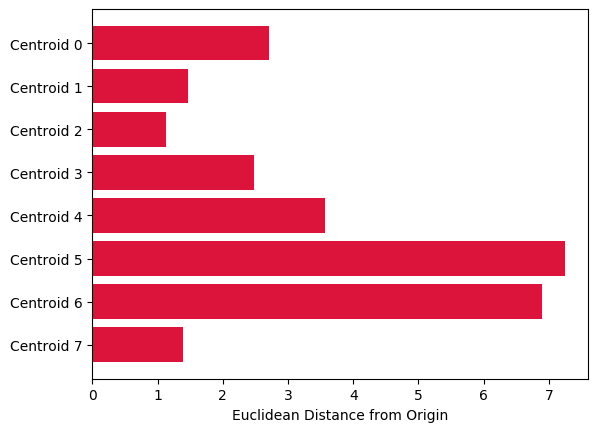

,Businesses,Debt Risk Score,Walk Score,Population,Average Income,Number of Cafes,Number of Parks/Playgrounds,Euclidean Distance
Centroid 0,-0.113481,0.183924,1.366639,-0.933358,0.120070,2.103009,-0.304421,2.704682
Centroid 1,-0.324407,1.260738,-0.108139,0.016303,0.391602,-0.525446,0.019245,1.461669
Centroid 2,-0.188619,-0.464789,-0.681680,0.057142,-0.337416,-0.400821,-0.514804,1.122091
Centroid 3,0.942822,-0.172983,-0.575749,2.078678,-0.460172,-0.525446,-0.336788,2.484453
Centroid 4,-0.149553,0.790275,1.320414,-0.280708,0.786692,0.139221,3.104861,3.570381
Centroid 5,0.266437,1.421529,1.150925,-0.914492,6.890640,-0.525446,-0.692820,7.244976
Centroid 6,6.091906,0.635439,2.422096,-1.193605,0.067392,1.468555,0.731310,6.892195
Centroid 7,-0.261284,-0.963540,-0.007253,-0.417660,-0.361829,-0.276196,0.731310,1.383181


In [192]:
labels=df_centroids.index.values

plt.rcdefaults()
fig, ax = plt.subplots()

y_pos=np.arange(len(labels))
ax.barh(y_pos,df_centroids['Euclidean Distance'],align='center',color='crimson')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()
ax.set_xlabel('Euclidean Distance from Origin')

plt.show()


df_centroids

Clusters 5 and 6 stand out from the crowd. Let's look at the neighborhoods in Cluster 5 and Cluster 6.

In [172]:
clustering_data.insert(0,"Cluster Label",k_means.labels_)

In [173]:
clustering_data

,Cluster Label,Neighborhood,Businesses,Debt Risk Score,Walk Score,Population,Average Income,Number of Cafes,Number of Parks/Playgrounds
0,2,"Thistletown-Beaumond Heights, Toronto",217,718,54,16790,28955,0.0,0.0
1,2,"Kingsview Village-The Westway, Toronto",160,717,56,16254,32004,0.0,0.0
2,2,"Willowridge-Martingrove-Richview, Toronto",169,750,51,26053,34579,1.0,0.0
3,1,"Markland Wood, Toronto",106,783,69,10240,51695,0.0,1.0
4,2,"Mimico, Toronto",619,741,71,14198,47011,1.0,0.0
5,0,"New Toronto, Toronto",368,719,79,10455,33415,3.0,0.0
6,7,"Long Branch, Toronto",170,724,72,9625,37288,1.0,1.0
7,1,"Alderwood, Toronto",309,764,70,11656,35239,0.0,0.0
8,7,"Humber Summit, Toronto",1373,715,61,12766,26117,0.0,1.0
9,2,"Humbermede, Toronto",374,695,58,14778,24297,0.0,0.0


Let's sort the clustering_data table by Cluster Label.

In [174]:
clustering_data.sort_values(by=['Cluster Label'],ascending=True)

,Cluster Label,Neighborhood,Businesses,Debt Risk Score,Walk Score,Population,Average Income,Number of Cafes,Number of Parks/Playgrounds
45,0,"Runnymede-Bloor West Village, Toronto",334,777,81,4382,42635,4.0,0.0
38,0,"Palmerston-Little Italy, Toronto",521,742,95,7917,31231,2.0,1.0
39,0,"Niagara, Toronto",591,747,84,6524,44611,2.0,0.0
40,0,"Dufferin Grove, Toronto",375,721,90,9875,27961,2.0,0.0
41,0,"Little Portugal, Toronto",344,727,88,5013,29224,4.0,1.0
42,0,"Roncesvalles, Toronto",540,741,91,15996,46820,3.0,0.0
48,0,"Dovercourt-Wallace Emerson-Juncti, Toronto",890,719,88,10338,25029,3.0,1.0
49,0,"Wychwood, Toronto",379,745,86,4182,53613,2.0,0.0
50,0,"Casa Loma, Toronto",258,771,80,3597,82203,2.0,0.0
34,0,"Playter Estates-Danforth, Toronto",301,757,90,3968,44557,2.0,0.0


Cluster 5

In [193]:
cluster_5=clustering_data[clustering_data['Cluster Label']==5]
cluster_5

,Cluster Label,Neighborhood,Businesses,Debt Risk Score,Walk Score,Population,Average Income,Number of Cafes,Number of Parks/Playgrounds
51,5,"Rosedale-Moore Park, Toronto",683,777,84,7672,213941,0.0,0.0


Cluster 6

In [194]:
cluster_6=clustering_data[clustering_data['Cluster Label']==6]
cluster_6

,Cluster Label,Neighborhood,Businesses,Debt Risk Score,Walk Score,Population,Average Income,Number of Cafes,Number of Parks/Playgrounds
37,6,"Bay Street Corridor, Toronto",4324,755,99,4787,40598,2.0,1.0


Cluster 5 and 6 both have only one neighborhood each. Let's combine them into a single dataframe.

In [195]:
Preferred_Neighborhoods=pd.concat([cluster_5,cluster_6],ignore_index=True)
Preferred_Neighborhoods

,Cluster Label,Neighborhood,Businesses,Debt Risk Score,Walk Score,Population,Average Income,Number of Cafes,Number of Parks/Playgrounds
0,5,"Rosedale-Moore Park, Toronto",683,777,84,7672,213941,0.0,0.0
1,6,"Bay Street Corridor, Toronto",4324,755,99,4787,40598,2.0,1.0


In [196]:
Preferred_Neighborhoods['Latitude']=''
Preferred_Neighborhoods['Longitude']=''
Preferred_Neighborhoods

,Cluster Label,Neighborhood,Businesses,Debt Risk Score,Walk Score,Population,Average Income,Number of Cafes,Number of Parks/Playgrounds,Latitude,Longitude
0,5,"Rosedale-Moore Park, Toronto",683,777,84,7672,213941,0.0,0.0,,
1,6,"Bay Street Corridor, Toronto",4324,755,99,4787,40598,2.0,1.0,,


In [197]:
i=0
while i<len(Preferred_Neighborhoods.index):
    j=0
    while j<len(df_combined):
        if Preferred_Neighborhoods.iloc[i,1]==df_combined.iloc[j,1]:
            Preferred_Neighborhoods.iloc[i,9]=df_combined.iloc[j,7]
            Preferred_Neighborhoods.iloc[i,10]=df_combined.iloc[j,8]
        j+=1
    i+=1
Preferred_Neighborhoods

,Cluster Label,Neighborhood,Businesses,Debt Risk Score,Walk Score,Population,Average Income,Number of Cafes,Number of Parks/Playgrounds,Latitude,Longitude
0,5,"Rosedale-Moore Park, Toronto",683,777,84,7672,213941,0.0,0.0,43.6904,-79.3833
1,6,"Bay Street Corridor, Toronto",4324,755,99,4787,40598,2.0,1.0,43.6645,-79.3872


Let's save Preferred_Neighborhood as a csv before putting a map together.

In [198]:
Preferred_Neighborhoods.to_csv('Preferred_Neighborhoods.csv',index=0)

In [199]:
Preferred_Neighborhoods=pd.read_csv('Preferred_Neighborhoods.csv')

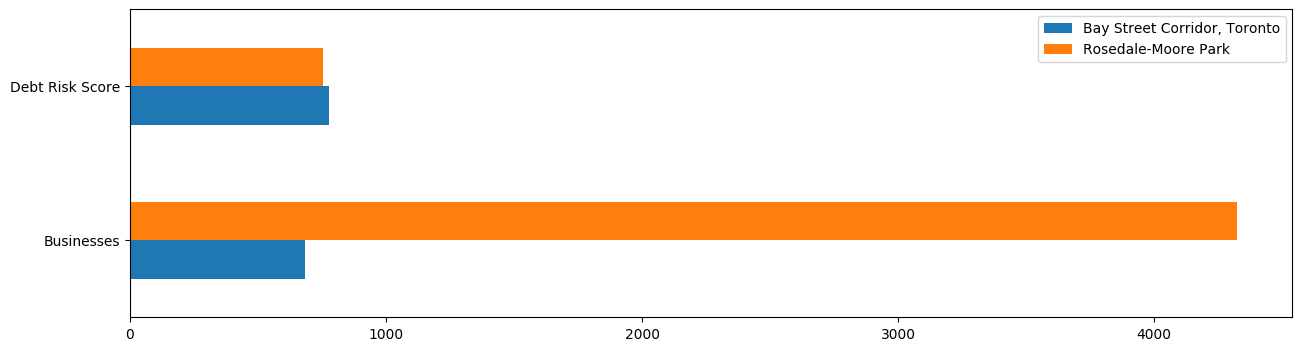

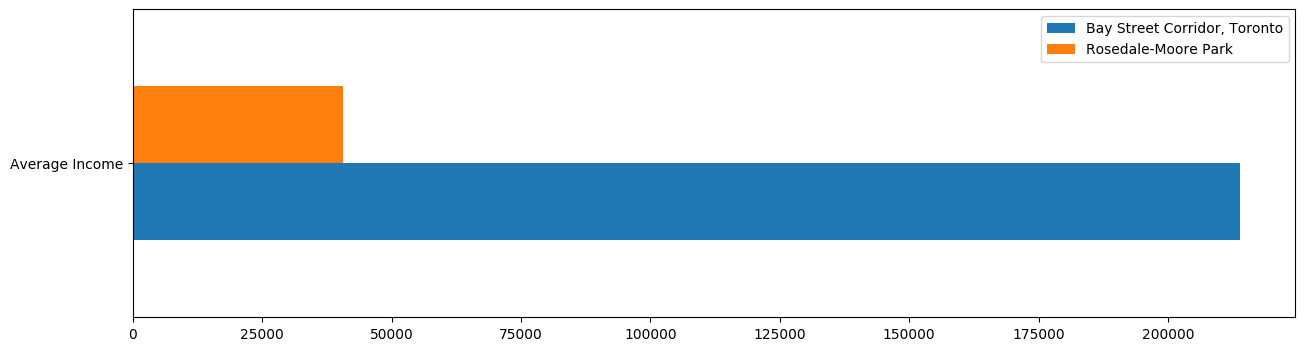

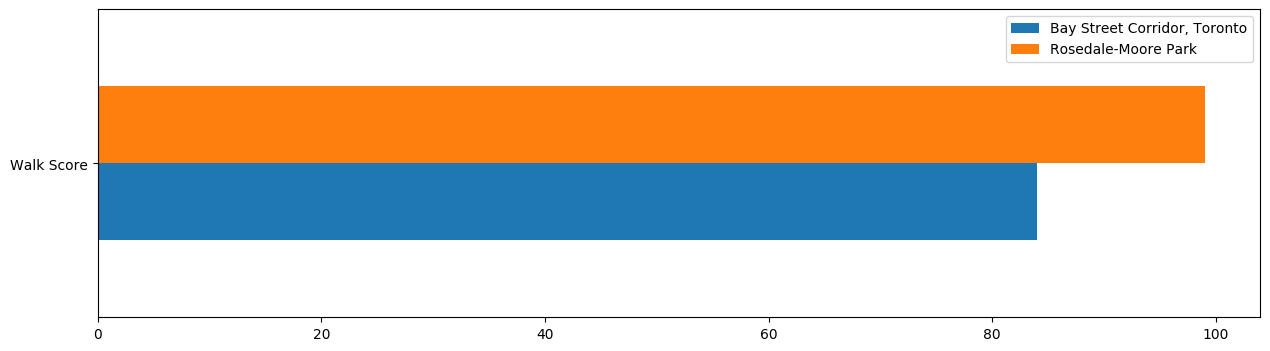

In [200]:
Preferred_Neighborhoods[['Businesses','Debt Risk Score']].T.rename(columns={0:'Bay Street Corridor, Toronto',1:'Rosedale-Moore Park'}).plot(kind='barh',figsize=(15,4))
Preferred_Neighborhoods[['Average Income']].T.rename(columns={0:'Bay Street Corridor, Toronto',1:'Rosedale-Moore Park'}).plot(kind='barh',figsize=(15,4))
Preferred_Neighborhoods[['Walk Score']].T.rename(columns={0:'Bay Street Corridor, Toronto',1:'Rosedale-Moore Park'}).plot(kind='barh',figsize=(15,4))

In [201]:
#use Folium library to draw map of Toronto and add pop-up circles marking preferred neighborhoods to set up a coffee shop.
map_toronto=folium.Map(location=[latitude+0.025,longitude],zoom_start=14,control_scale=True)     #location=[latitude+0.025,longitude],0.025 is the offset added to center the map to show both neighborhoods on the same map

for lat, lng, neighborhood in zip(Preferred_Neighborhoods['Latitude'], Preferred_Neighborhoods['Longitude'], Preferred_Neighborhoods['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=12,
        popup=label,
        color='green',
        fill=True,
        fill_color='orange',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto